In [1]:
import os
import pickle as pkl
import sys

import numpy as np
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
# from matplotlib.colors import LogNorm
# from matplotlib.ticker import AutoMinorLocator, MultipleLocator, MaxNLocator

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

try:
    os.environ['SESNPATH']
    os.environ['SESNCFAlib']

except KeyError:
    print ("must set environmental variable SESNPATH and SESNCfAlib")
    sys.exit()

cmd_folder = os.getenv("SESNCFAlib")
if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)

from savgol import savitzky_golay
from snclasses import *
from templutils import *
from makePhottable import *
from colors import rgb_to_hex

In [36]:
b = 'g'

templatePkl = "ubertemplates/UberTemplate_%s.pkl"%(b + 'p' if b in ['u', 'r', 'i']
                                                    else b)

with open(templatePkl, 'rb') as f:
    u = pkl._Unpickler(f)
    u.encoding = 'latin1'
    tmpl = u.load()

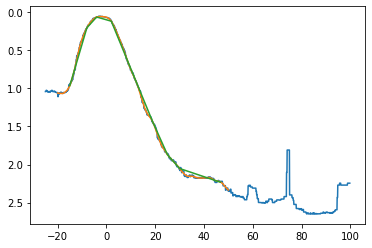

In [39]:
plt.plot(tmpl['phs'], tmpl['med'])
# plt.plot(tmpl['phs'][:len(np.concatenate([med_, med_remaining]))], np.concatenate([med_, med_remaining]))

plt.plot(tmpl['epochs_med'], tmpl['med_smoothed'])
plt.plot(x, tmpl['spl_med'](x))
# plt.yscale('log')
plt.gca().invert_yaxis()
# plt.xlim(96,110)

In [87]:
med_ = np.asarray(savitzky_golay(tmpl['med'], 141, 3)[~np.isnan(savitzky_golay(tmpl['med'], 141, 3))])
ind_ = len(med_[~np.isnan(med_)])-1
med_remaining = np.asarray(savitzky_golay(tmpl['med'][~np.isnan(tmpl['med'])][ind_:], 5,3)[~np.isnan(savitzky_golay(tmpl['med'][~np.isnan(tmpl['med'])][ind_:], 5,3))])

print(len(tmpl['phs'])-(len(med_)+len(med_remaining)))

np.concatenate([med_, med_remaining])

array([1.02585463, 1.02619712, 1.02654088, ..., 1.88500023, 1.88500023,
       1.88500023])

In [58]:
pwd

'/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/maketemplates'

In [126]:
templatePkl = "/Users/somayeh/Desktop/new results/BFGS_no_bounds1/all_params_scipy_opt.pkl"

with open(templatePkl, 'rb') as f:
    u = pkl._Unpickler(f)
    u.encoding = 'latin1'
    tmpl = u.load()

In [127]:
bands = {'U': [[],[]], 'u': [[],[]], 'B': [[],[]], 'V': [[],[]], 'R': [[],[]], 'I': [[],[]], 'g': [[],[]], 'r': [[],[]], 'i': [[],[]], 'J': [[],[]], 'H': [[],[]],\
         'K': [[],[]], 'w1': [[],[]], 'w2': [[],[]], 'm2': [[],[]]}


for key in (tmpl.keys()):
    
    results = tmpl[key]
    for b in results.keys():
        
        if len(results[b]) != 0:
            bands[b][0].append(results[b][0][0])
            bands[b][1].append(results[b][0][1])
    
    

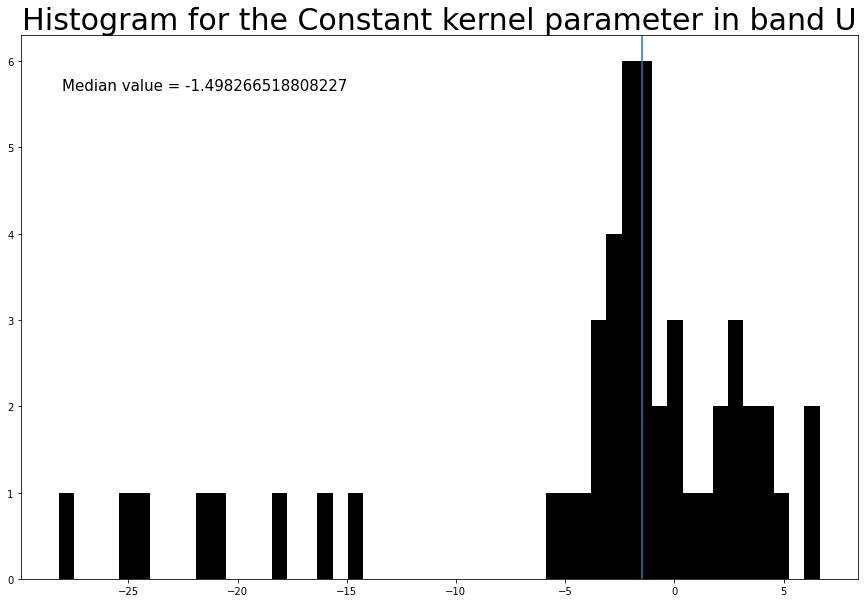

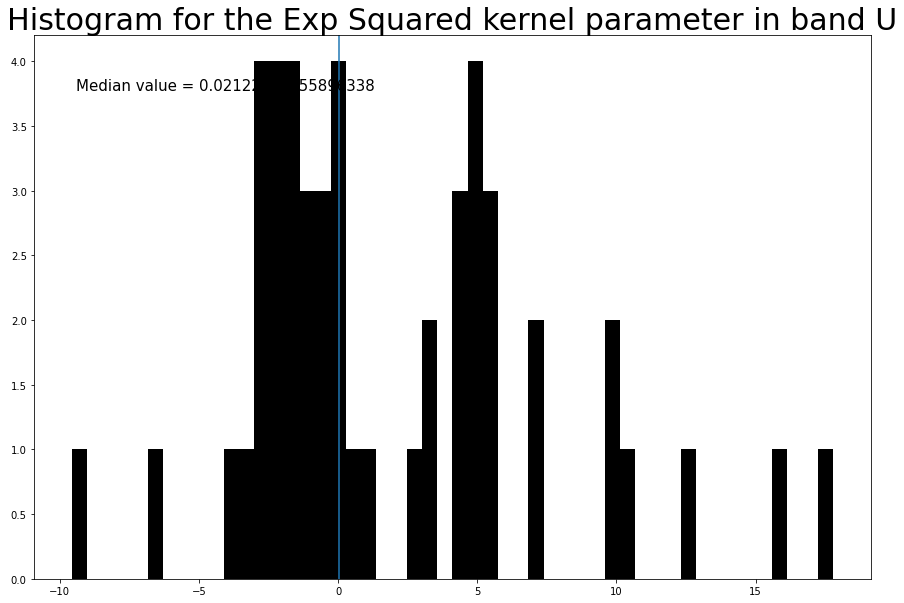

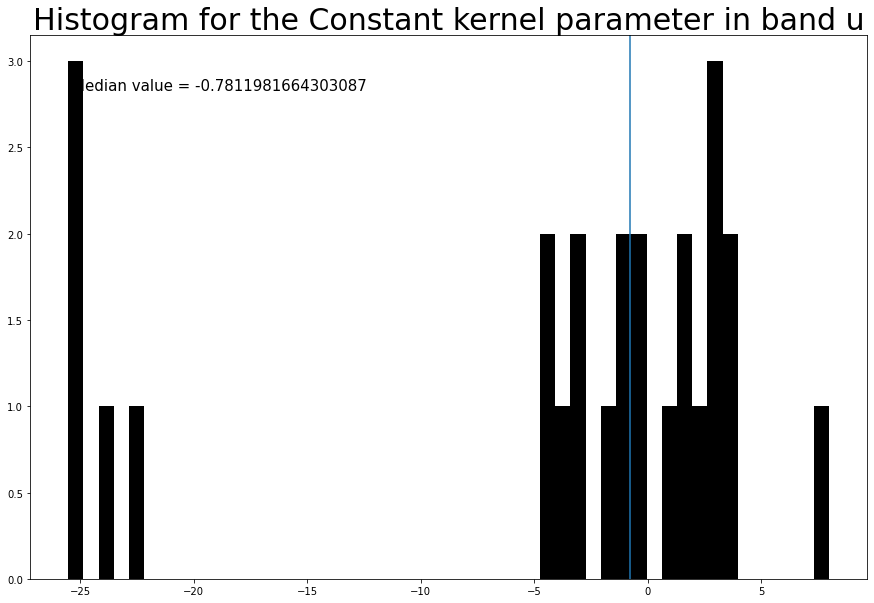

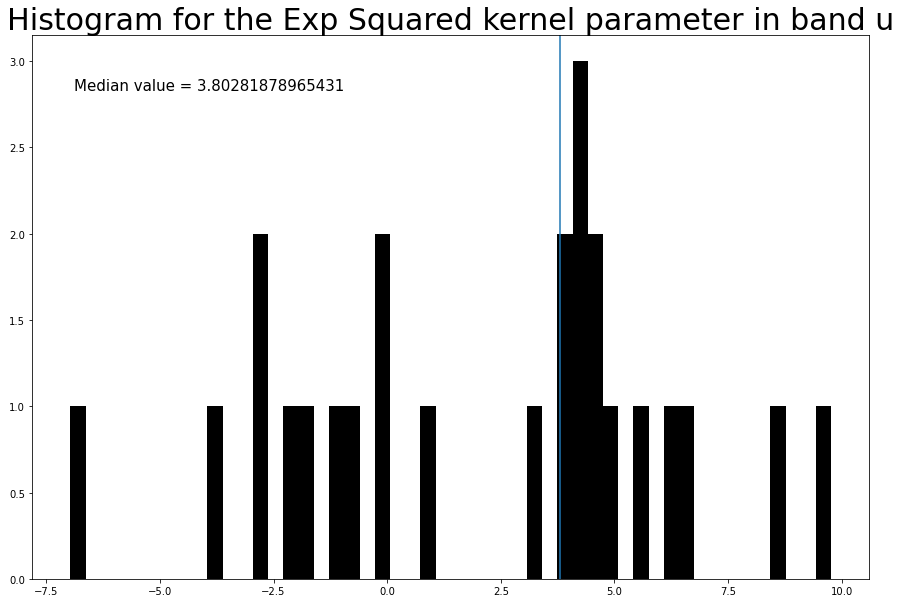

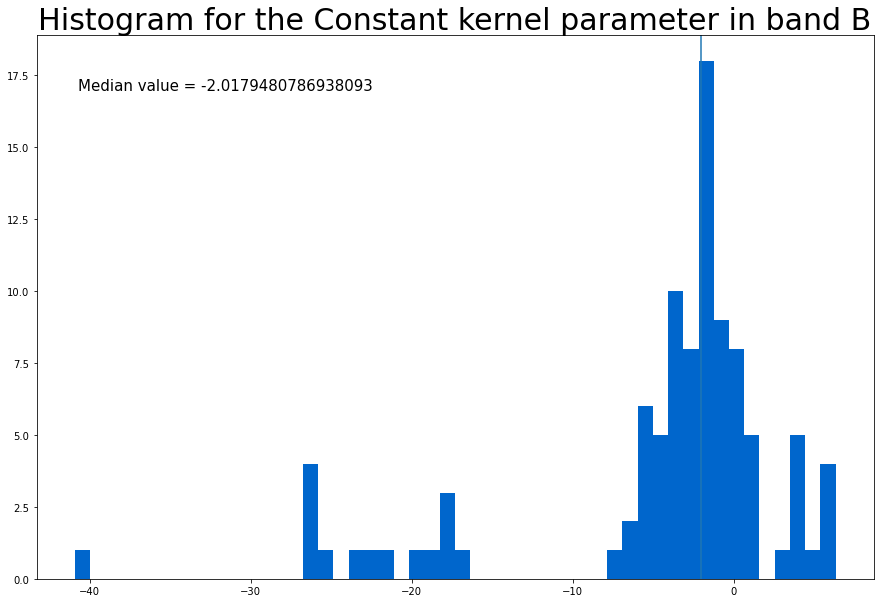

Error in callback <function flush_figures at 0x7f89120fef80> (for post_execute):


KeyboardInterrupt: 

In [128]:
i = 0

mycolors = {'U':'k','u':'k','B':'#0066cc','V':'#47b56c','R':'#b20000','I':'m',
                         'r':'#b20000','i':'m', 'g': '#317e4b',
                         'J':'#4F088A','H':'#FFB700','K':'#A4A4A4',
                         'm2':'#708090', 'w2':'#a9b2bc', 'w1':'#434d56'}

med_const = []
med_exp_sqr = []

for b in bands.keys():
    
    if b in ['J','K','H', 'm2','w2', 'w1']:
        continue 
        
    
    plt.figure(i, figsize=(15,10))
    plt.hist(bands[b][0], bins = 50, color = mycolors[b])
    plt.title('Histogram for the Constant kernel parameter in band '+ str(b), size=30)
    plt.axvline(np.median(bands[b][0]))
    plt.text(0.05,0.9,'Median value = '+str(np.median(bands[b][0])),size = 15, transform=plt.gca().transAxes)
    med_const.append(np.median(bands[b][0]))
    plt.savefig('outputs/hist_const_ker_'+str(b)+'.png')
    i += 1
    plt.figure(i, figsize=(15,10))
    plt.hist(bands[b][1], bins = 50, color = mycolors[b])
    plt.axvline(np.median(bands[b][1]))
    med_exp_sqr.append(np.median(bands[b][1]))
    plt.title('Histogram for the Exp Squared kernel parameter in band '+ str(b), size=30)
    plt.text(0.05,0.9,'Median value = '+str(np.median(bands[b][1])),size = 15, transform=plt.gca().transAxes)
    plt.savefig('outputs/hist_exp_sqr_ker_'+str(b)+'.png')
    i += 1

In [130]:
print(f"Constant Kernel parameter is {round(np.median(med_const),2)} and the Exp Squared kernel is {round(np.median(med_exp_sqr),2)}")

Constant Kernel parameter is -2.02 and the Exp Squared kernel is -0.93


-0.9322153535757607